# Komons Case Study - Twitter Dataset

- Plataforma: Twitter
- País. Kenya
- Tema: Sexual and reproductive health (SRH)
- Idioma: Inglés
- Formato: TSV (Tab separated values)

In [142]:
import pandas as pd
import numpy as np
from datetime import datetime
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [143]:
df = pd.read_csv('datasetTwitter.tsv', sep='\t')

In [144]:
# dropping columns with all null values
df.drop(list(df.columns[df.isnull().all()]), axis=1, inplace=True)

### Adding date column

In [145]:
# creating day column
df['day'] = df['date'].apply(lambda x: datetime.fromtimestamp(x/1000).strftime('%Y-%m-%d'))

### Getting holidays

In [146]:
# the idea was to see if any peaks in no. of tweets corresponded with hoildays in Kenya
# there didn't appear to be any overlap

from datetime import date
import holidays

In [147]:
#df['holiday'] = df['day'].apply(lambda x: holidays.KE().get(x))

### Graphing all data

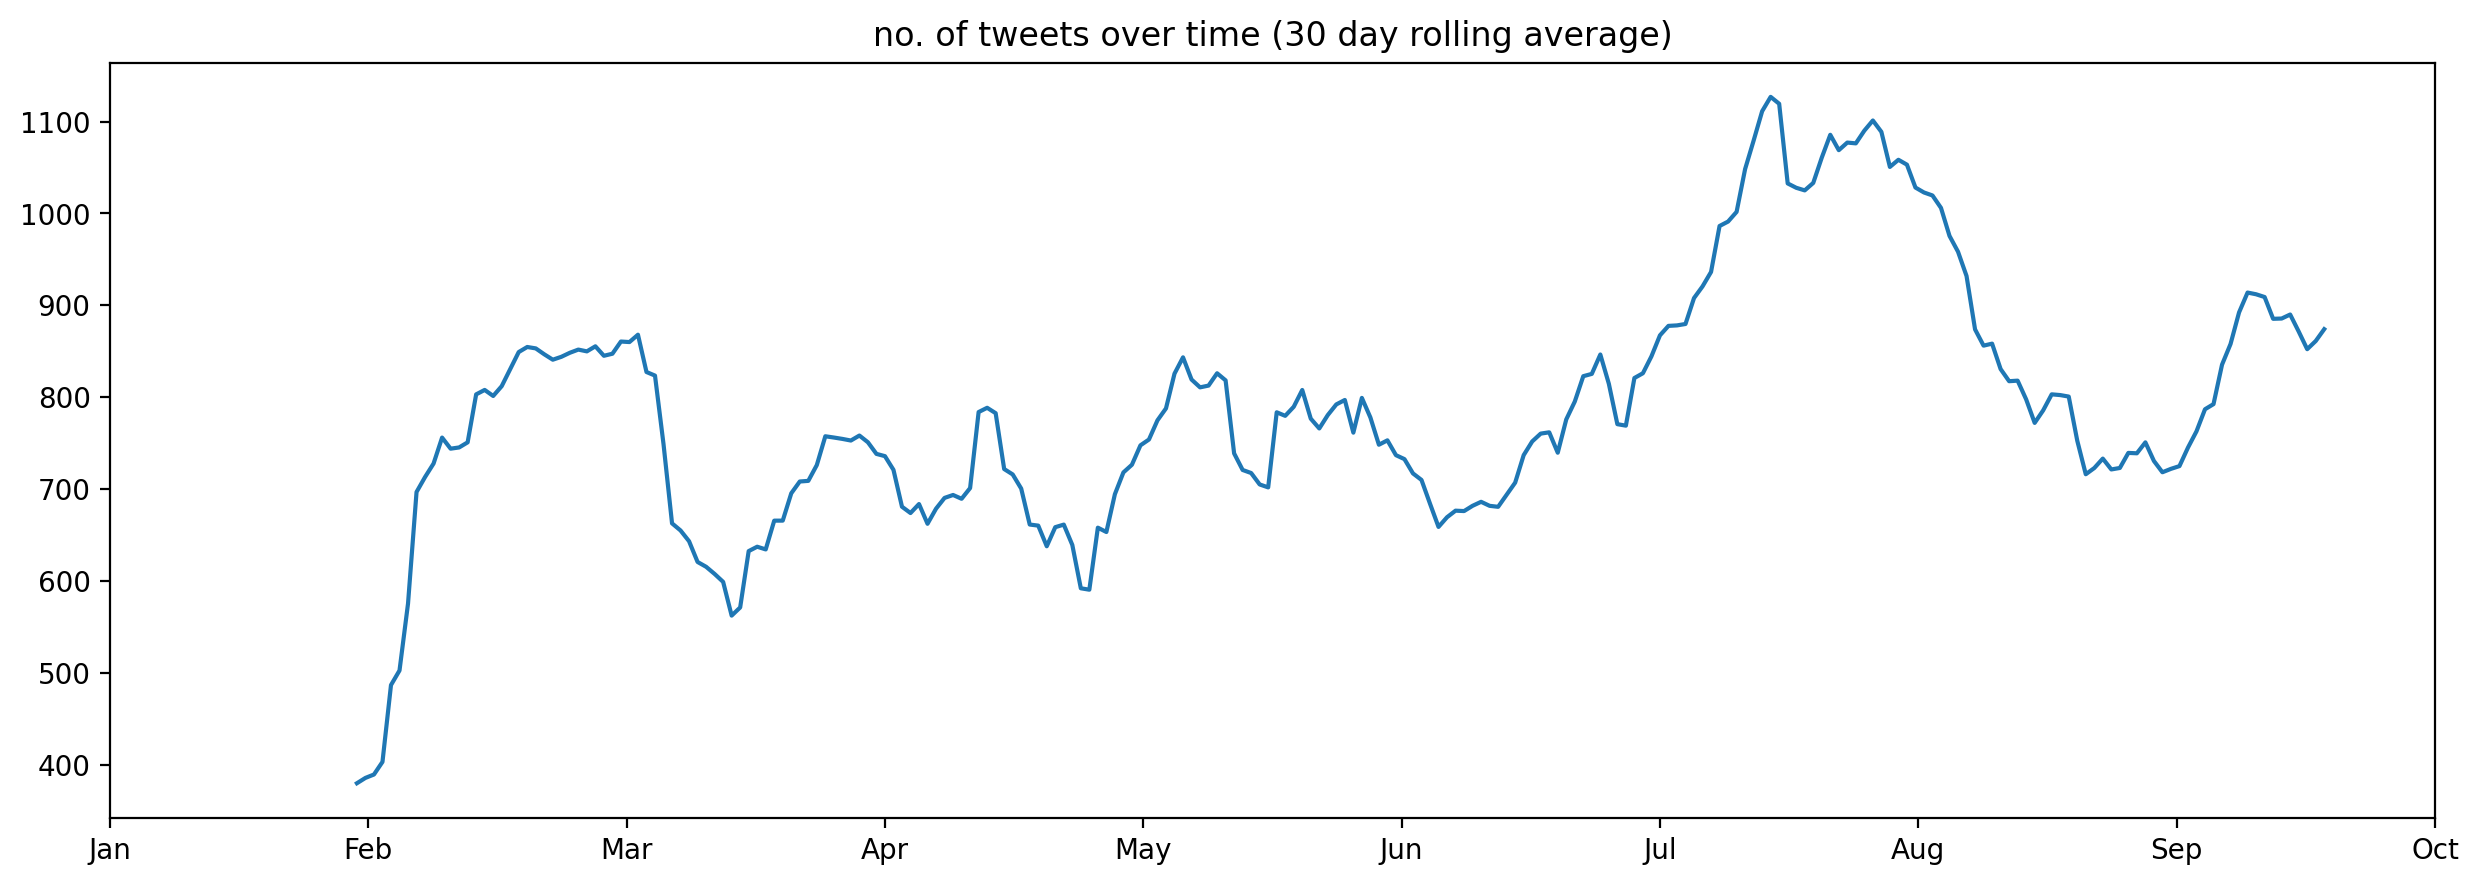

In [148]:
plt.figure(figsize=(15,5), dpi=200)
plt.title('no. of tweets over time (30 day rolling average)')

plt.plot(df.groupby('day').count().reset_index()['content'].rolling(30).mean())

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']
plt.xticks(np.linspace(0,273,10), months);

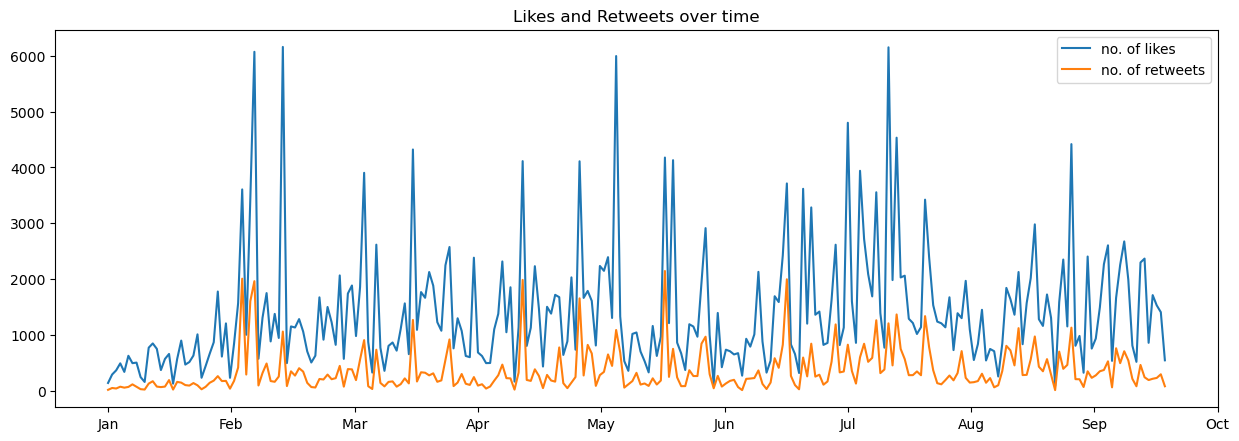

In [149]:
plt.figure(figsize=(15,5), dpi=100)
plt.title('Likes and Retweets over time')
plt.plot(df.groupby('day').sum().reset_index()['no. of likes'], label='no. of likes')
plt.plot(df.groupby('day').sum().reset_index()['no. of retweets'], label='no. of retweets')

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']
plt.xticks(np.linspace(0,273,10), months)

plt.legend();

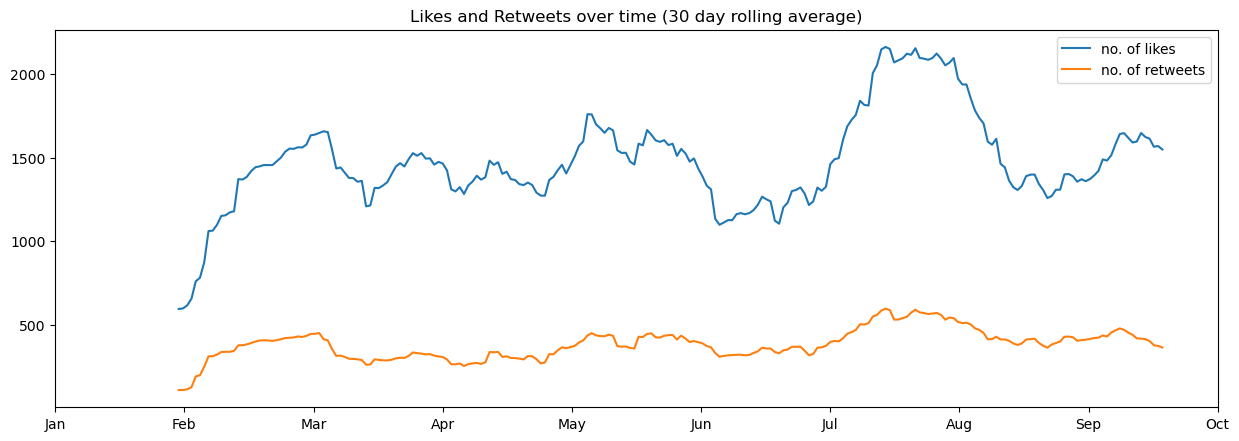

In [150]:
plt.figure(figsize=(15,5), dpi=100)
plt.title('Likes and Retweets over time (30 day rolling average)')
plt.plot(df.groupby('day').sum().reset_index()['no. of likes'].rolling(30).mean(), label='no. of likes')
plt.plot(df.groupby('day').sum().reset_index()['no. of retweets'].rolling(30).mean(), label='no. of retweets')

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']
plt.xticks(np.linspace(0,273,10), months)

plt.legend();

### separating out topics

In [151]:
# separating out topics into different categories
# these could be adjusted if need be

sexual_health_rights = ['srh','srhr','sexual health','sexual rights','sex rights','reproductive health','sexual and reproductive','reproductive rights'] 
contraception = ['family planning','contraception','contraceptive','contraceptives','condom','condoms','the pill','iud','diaphragm','diaphragms','intrauterine device','morning after pill']
sexual_education = ['sexual education','sex education','sexuality education','sex talk']
fertility = ['sterilization', 'fertility awareness']
stds = ['stds', 'stis']
pregnancy_abortion = ['early pregnancies', 'teenage pregnancies', 'teenage pregnancy','unintended pregnancy','unwanted pregnancy','unintended pregnancies','unwanted pregnancies','termination of pregnancy','continuing pregnancy','continuing a pregnancy','continue pregnancy','end pregnancy','terminate pregnancy', 'abortion' 'abortions','abort','aborts','aborting']
body_automony = ['body autonomy','own body']
multilation = ['genital mutilation','fgm']
foetal = ['foetus','fetal']

In [152]:
# creating a dictionary to store the lists

topic_dict = {'sexual_health_rights':sexual_health_rights, 'contraception':contraception, 'sexual_education':sexual_education, 'fertility':fertility, 'stds':stds, 'pregnancy_abortion':pregnancy_abortion, 
'body_automony':body_automony, 'multilation':multilation, 'foetal':foetal}

### Creating boolean column for each topic

In [153]:
# creates a column which indicates the presence of a topic in the row
# there can be more than one topic present in a tweet

In [154]:
# checking for match in topics

topics = df['topics'].str.split(',').explode().str.lower()

for key, value in topic_dict.items():
    topic_list_filter = topics[topics.isin(value)]
    df[key] = df.index.isin(topic_list_filter.groupby(topic_list_filter.index).agg(','.join).index)

In [155]:
# checking for match in content

for key, value in topic_dict.items():
    for word in value:
        df[key] = df[key] | df['content'].str.contains(word)

In [156]:
df.head()

,Modularity,Eigenvector,no. of comments,no. of likes,no. of shares,no. of retweets,content,bio,search,source,application,date,parent,language,parent source identifier,domain,topics,sentiment,sentiment class,sentiment by,visibility,potential impressions,actual impressions,city,country,latitude,longitude,user city,user country,user latitude,user longitude,no. of followers,no. of friends,gender,links url,post subtype,day,sexual_health_rights,contraception,sexual_education,fertility,stds,pregnancy_abortion,body_automony,multilation,foetal
0,1.0,0.109824,0,2990,0,448,Paying for sex was the lowest moment in my sex...,"GIGO. | d(-_-)b | 6 stars = GC, BH, SG... DY A...",79684,Twitter,Twitter for Android,1621538636000,0,tl,id:,twitter.com,"Niliendanga Latema na psyche,Kitu sikuwahi ele...",-0.487021,negative,1,1812.19,15618,1717,NaN,KE,-0.023559,37.906193,NaN,KE,-0.023559,37.906193,15618,1093,unknown,NaN,original post,2021-05-20,False,True,False,False,False,False,False,False,False
1,4.0,0.095613,0,2905,0,285,Niko hapa kuwakumbusha huku nje watu ni wagonj...,Your Time To Shine Is Coming💯,79684,Twitter,Twitter for Android,1626111743000,0,en,id:,twitter.com,Niko hapa kuwakumbusha huku nje watu ni wagonj...,0.000000,neutral,1,1950.49,92469,10171,NaN,KE,-0.023559,37.906193,NaN,KE,-0.023559,37.906193,92469,17365,unknown,NaN,original post,2021-07-12,False,True,False,False,False,False,False,False,False
2,4.0,0.000000,0,2891,0,98,"If condom isn't available, what else can one u...",Twitter for fun😁 Simp😔,79684,Twitter,Twitter for Android,1613241053000,0,en,id:,twitter.com,"condom,protection",0.000000,neutral,1,932.88,45741,5031,NaN,KE,-0.023559,37.906193,NaN,KE,-0.023559,37.906193,45741,608,unknown,NaN,original post,2021-02-13,False,True,False,False,False,False,False,False,False
3,1.0,0.304044,0,2374,0,270,There is currently a shortage of ARVs and cond...,"If you don't have bread, eat cake",79684,Twitter,Twitter for Android,1625476309000,0,en,id:,twitter.com,"shortage of ARVs,condoms,country,information",0.000000,neutral,1,2134.96,221794,24397,NaN,KE,-0.562854,34.320353,NaN,KE,-0.562854,34.320353,221794,15925,unknown,NaN,original post,2021-07-05,False,True,False,False,False,False,False,False,False
4,1.0,0.034177,0,1938,0,135,"Enough with the sex education, how about you t...",Live a little.,79684,Twitter,Twitter for iPhone,1617309660000,0,en,id:,twitter.com,"sex education,house,grand",0.354187,positive,1,1280.78,96390,10602,NaN,KE,-0.023559,37.906193,NaN,KE,-0.023559,37.906193,96390,1006,unknown,NaN,original post,2021-04-01,False,False,True,False,False,False,False,False,False


### Graphing tweets per day

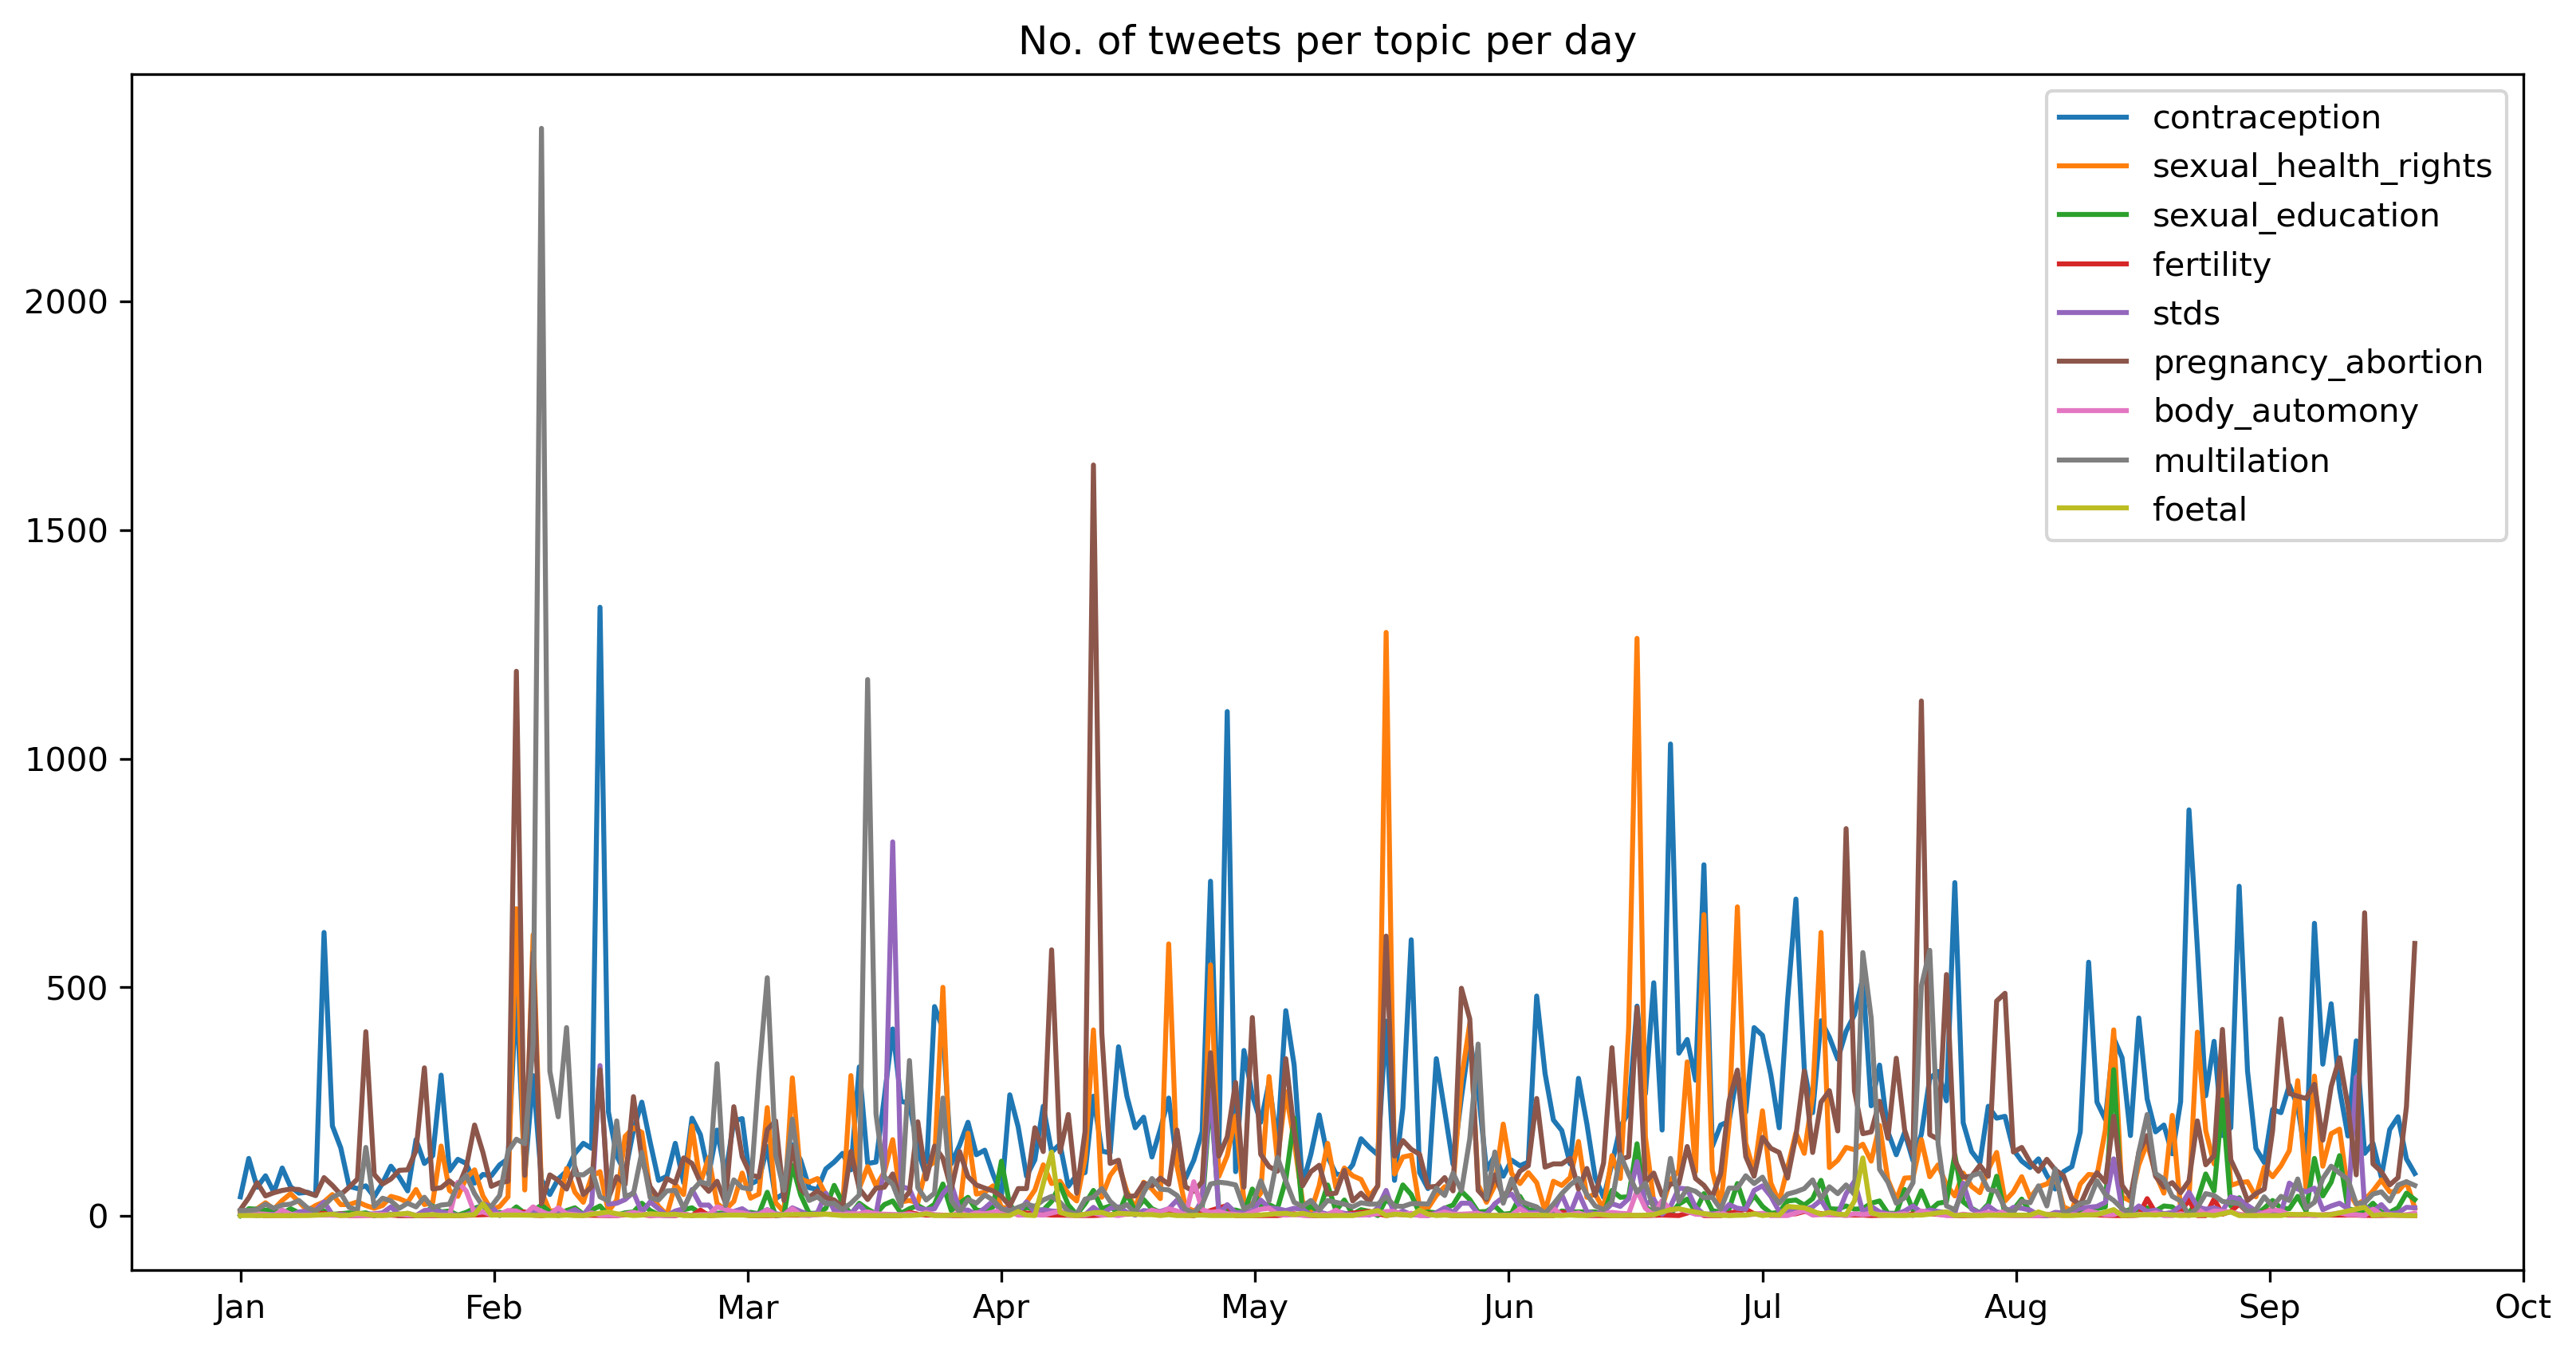

In [157]:
fig = plt.figure(figsize=(10, 5), dpi=300)

ax = fig.add_axes([0,0,1,1])
ax.set_title('No. of tweets per topic per day')

ax.plot(df[df['contraception']].groupby('day').sum().reset_index()['day'], df[df['contraception'] == True].groupby('day').sum().reset_index()['contraception'], label='contraception')
ax.plot(df[df['sexual_health_rights']].groupby('day').sum().reset_index()['day'], df[df['sexual_health_rights'] == True].groupby('day').sum().reset_index()['sexual_health_rights'], label='sexual_health_rights')
ax.plot(df[df['sexual_education']].groupby('day').sum().reset_index()['day'], df[df['sexual_education'] == True].groupby('day').sum().reset_index()['sexual_education'], label='sexual_education')
ax.plot(df[df['fertility']].groupby('day').sum().reset_index()['day'], df[df['fertility'] == True].groupby('day').sum().reset_index()['fertility'], label='fertility')
ax.plot(df[df['stds']].groupby('day').sum().reset_index()['day'], df[df['stds'] == True].groupby('day').sum().reset_index()['stds'], label='stds')
ax.plot(df[df['pregnancy_abortion']].groupby('day').sum().reset_index()['day'], df[df['pregnancy_abortion'] == True].groupby('day').sum().reset_index()['pregnancy_abortion'], label='pregnancy_abortion')
ax.plot(df[df['body_automony']].groupby('day').sum().reset_index()['day'], df[df['body_automony'] == True].groupby('day').sum().reset_index()['body_automony'], label='body_automony')
ax.plot(df[df['multilation']].groupby('day').sum().reset_index()['day'], df[df['multilation'] == True].groupby('day').sum().reset_index()['multilation'], label='multilation')
ax.plot(df[df['foetal']].groupby('day').sum().reset_index()['day'], df[df['foetal'] == True].groupby('day').sum().reset_index()['foetal'], label='foetal')

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']
plt.xticks(np.linspace(0,273,10), months)

ax.legend();

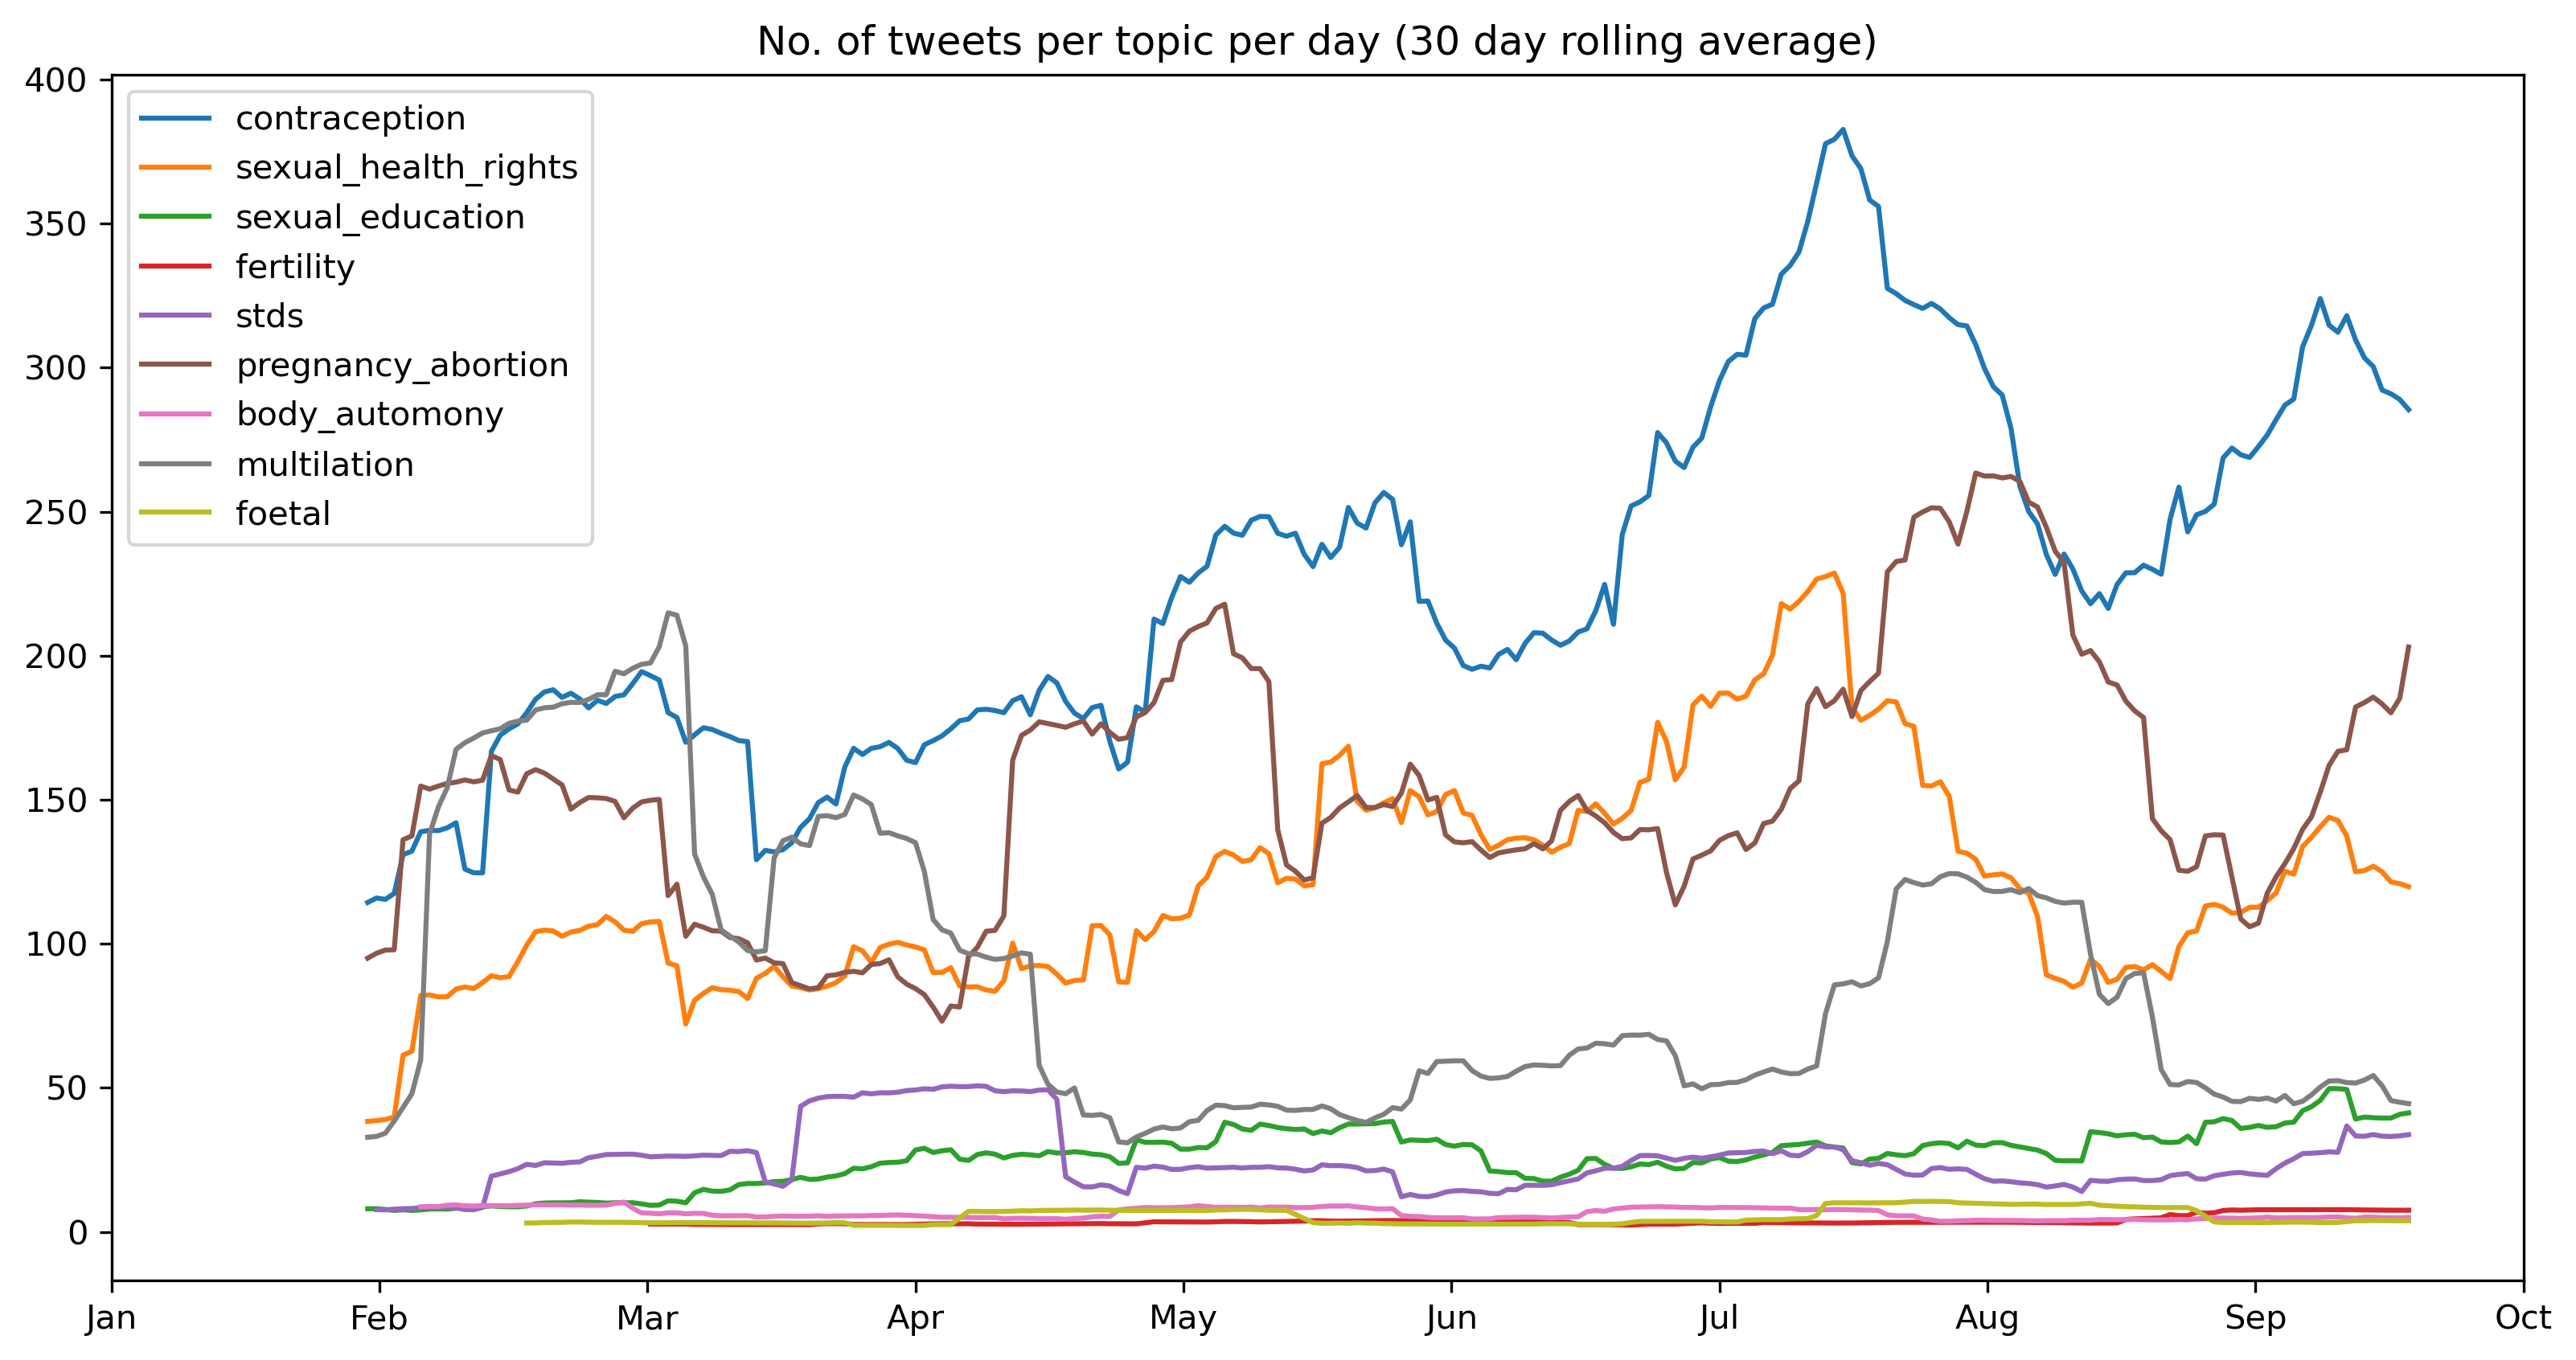

In [158]:
fig = plt.figure(figsize=(10, 5), dpi=300)

ax = fig.add_axes([0,0,1,1])
ax.set_title('No. of tweets per topic per day (30 day rolling average)')

ax.plot(df[df['contraception']].groupby('day').sum().reset_index()['day'], df[df['contraception'] == True].groupby('day').sum().reset_index()['contraception'].rolling(30).mean(), label='contraception')
ax.plot(df[df['sexual_health_rights']].groupby('day').sum().reset_index()['day'], df[df['sexual_health_rights'] == True].groupby('day').sum().reset_index()['sexual_health_rights'].rolling(30).mean(), label='sexual_health_rights')
ax.plot(df[df['sexual_education']].groupby('day').sum().reset_index()['day'], df[df['sexual_education'] == True].groupby('day').sum().reset_index()['sexual_education'].rolling(30).mean(), label='sexual_education')
ax.plot(df[df['fertility']].groupby('day').sum().reset_index()['day'], df[df['fertility'] == True].groupby('day').sum().reset_index()['fertility'].rolling(30).mean(), label='fertility')
ax.plot(df[df['stds']].groupby('day').sum().reset_index()['day'], df[df['stds'] == True].groupby('day').sum().reset_index()['stds'].rolling(30).mean(), label='stds')
ax.plot(df[df['pregnancy_abortion']].groupby('day').sum().reset_index()['day'], df[df['pregnancy_abortion'] == True].groupby('day').sum().reset_index()['pregnancy_abortion'].rolling(30).mean(), label='pregnancy_abortion')
ax.plot(df[df['body_automony']].groupby('day').sum().reset_index()['day'], df[df['body_automony'] == True].groupby('day').sum().reset_index()['body_automony'].rolling(30).mean(), label='body_automony')
ax.plot(df[df['multilation']].groupby('day').sum().reset_index()['day'], df[df['multilation'] == True].groupby('day').sum().reset_index()['multilation'].rolling(30).mean(), label='multilation')
ax.plot(df[df['foetal']].groupby('day').sum().reset_index()['day'], df[df['foetal'] == True].groupby('day').sum().reset_index()['foetal'].rolling(30).mean(), label='foetal')

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']
plt.xticks(np.linspace(0,273,10), months)

ax.legend();

### Graphing total likes per day

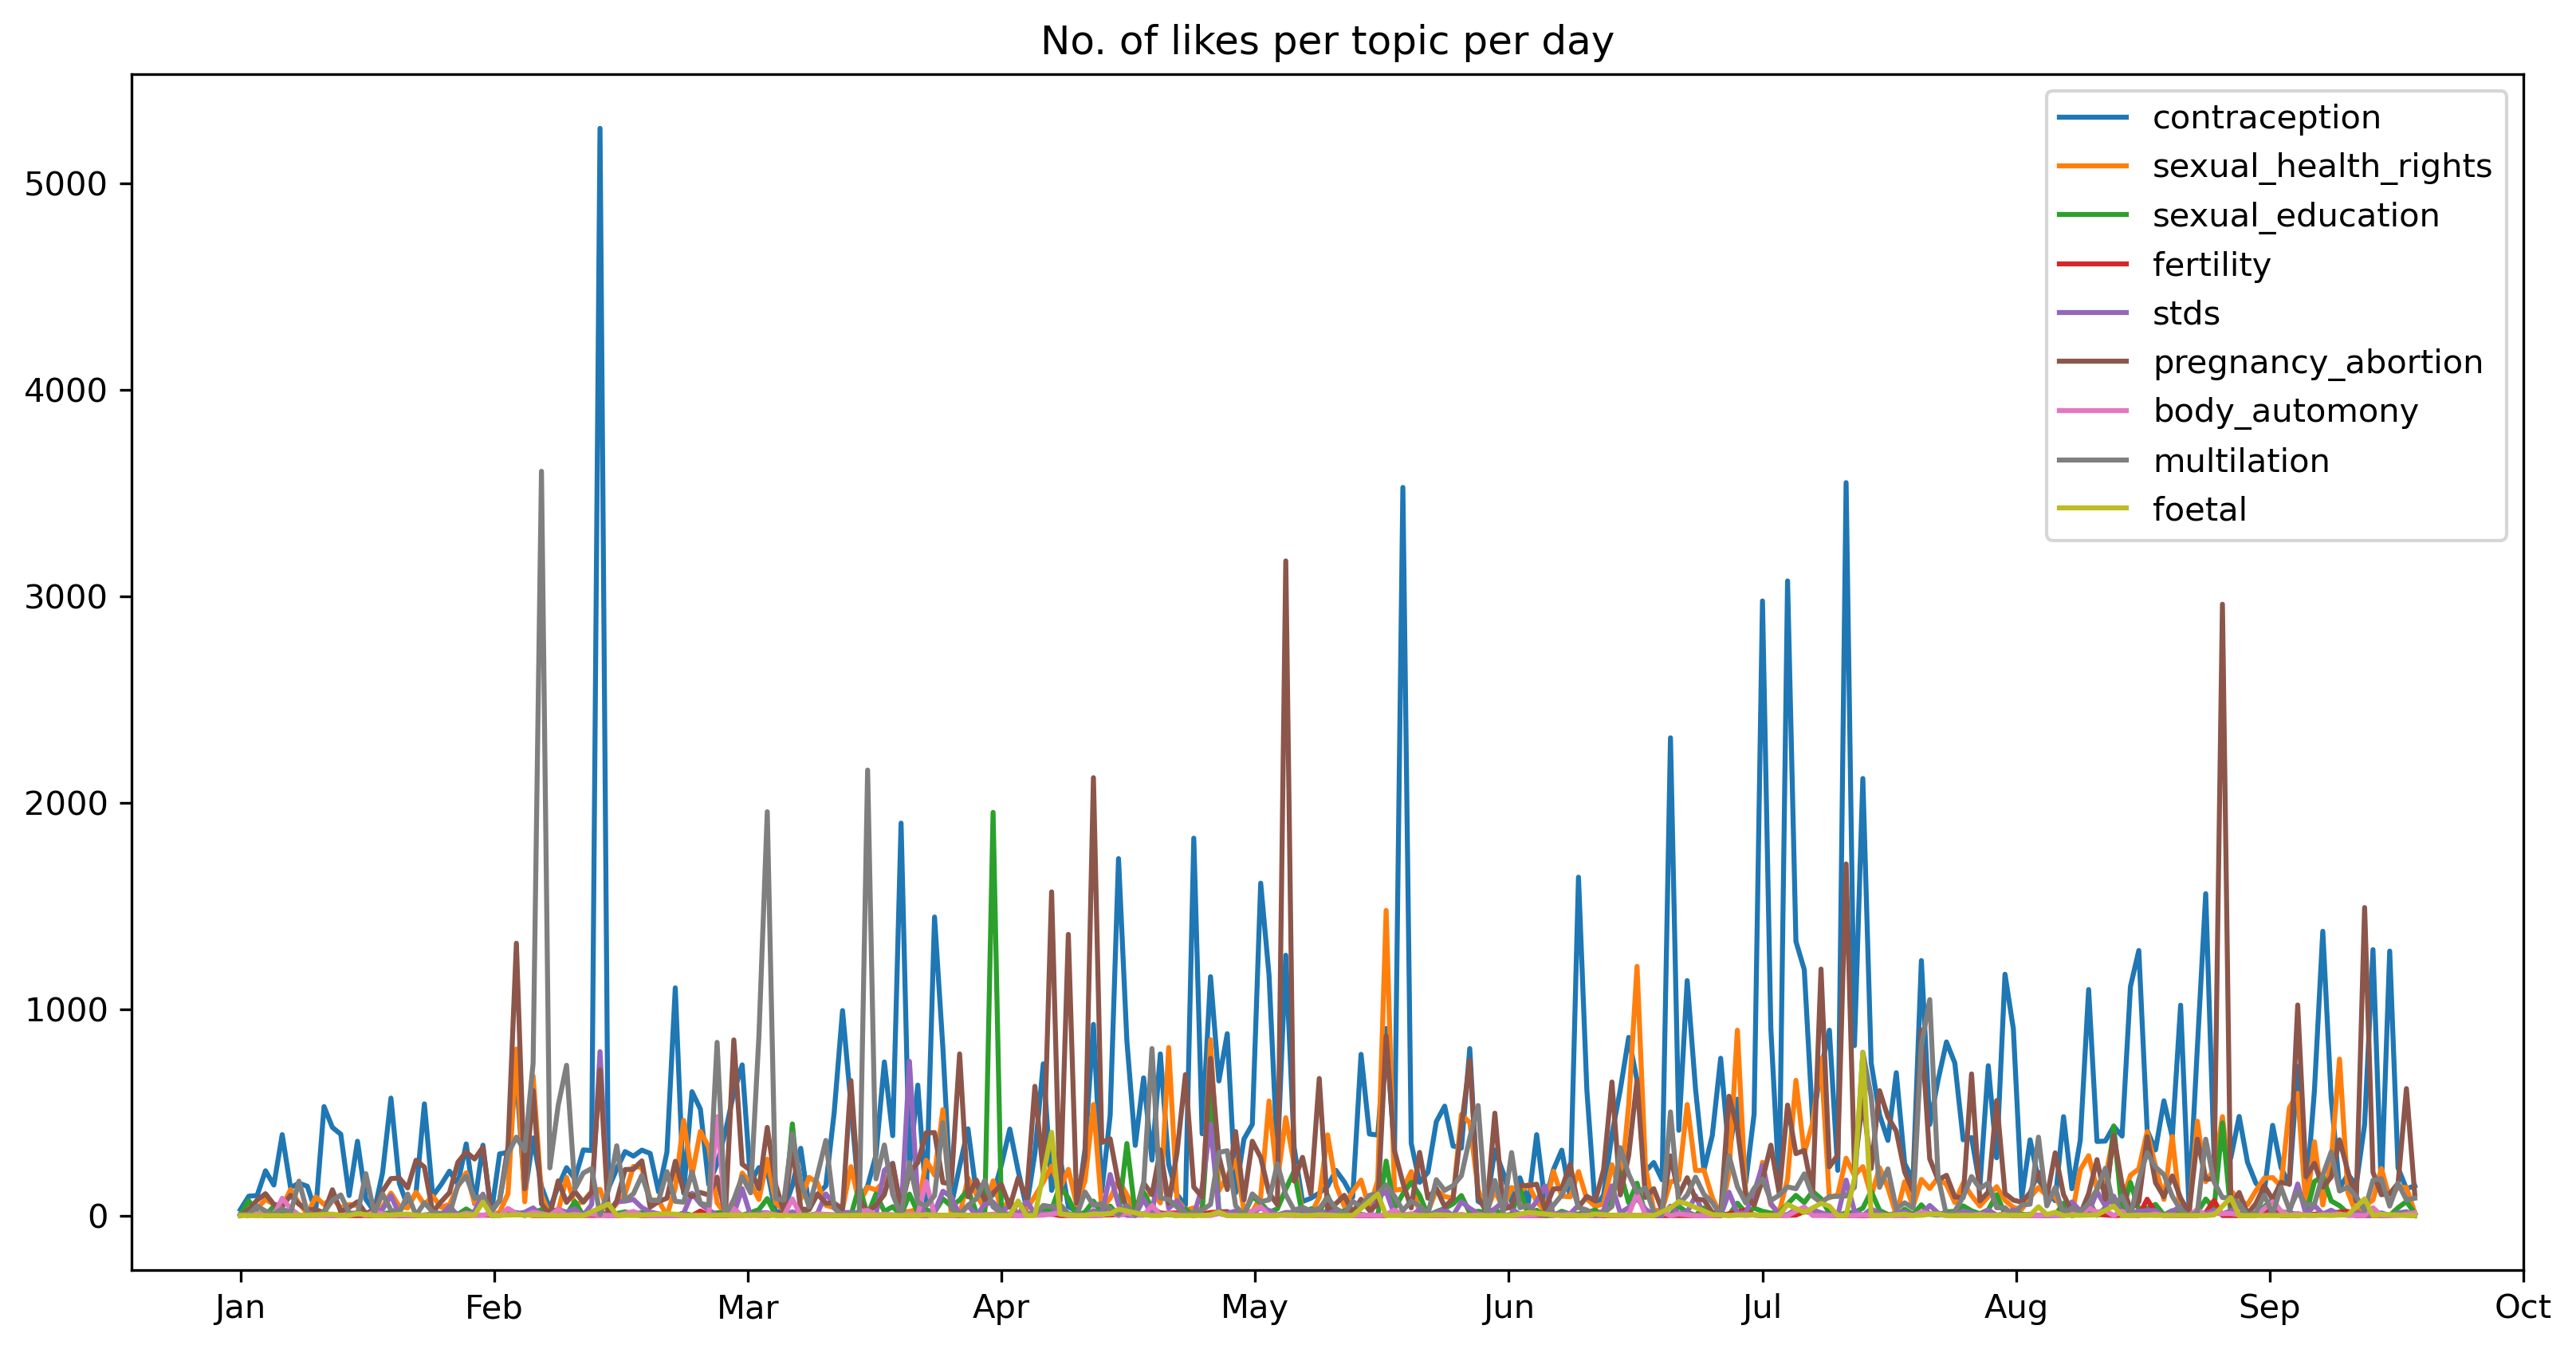

In [ ]:
fig = plt.figure(figsize=(10, 5), dpi=300)

ax = fig.add_axes([0,0,1,1])
ax.set_title('No. of likes per topic per day')

ax.plot(df[df['contraception'] == True].groupby('day').sum().reset_index()['day'], df[df['contraception'] == True].groupby('day').sum().reset_index()['no. of likes'], label='contraception')
ax.plot(df[df['sexual_health_rights'] == True].groupby('day').sum().reset_index()['day'], df[df['sexual_health_rights'] == True].groupby('day').sum().reset_index()['no. of likes'], label='sexual_health_rights')
ax.plot(df[df['sexual_education'] == True].groupby('day').sum().reset_index()['day'], df[df['sexual_education'] == True].groupby('day').sum().reset_index()['no. of likes'], label='sexual_education')
ax.plot(df[df['fertility'] == True].groupby('day').sum().reset_index()['day'], df[df['fertility'] == True].groupby('day').sum().reset_index()['no. of likes'], label='fertility')
ax.plot(df[df['stds'] == True].groupby('day').sum().reset_index()['day'], df[df['stds'] == True].groupby('day').sum().reset_index()['no. of likes'], label='stds')
ax.plot(df[df['pregnancy_abortion'] == True].groupby('day').sum().reset_index()['day'], df[df['pregnancy_abortion'] == True].groupby('day').sum().reset_index()['no. of likes'], label='pregnancy_abortion')
ax.plot(df[df['body_automony'] == True].groupby('day').sum().reset_index()['day'], df[df['body_automony'] == True].groupby('day').sum().reset_index()['no. of likes'], label='body_automony')
ax.plot(df[df['multilation'] == True].groupby('day').sum().reset_index()['day'], df[df['multilation'] == True].groupby('day').sum().reset_index()['no. of likes'], label='multilation')
ax.plot(df[df['foetal'] == True].groupby('day').sum().reset_index()['day'], df[df['foetal'] == True].groupby('day').sum().reset_index()['no. of likes'], label='foetal')

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']
plt.xticks(np.linspace(0,273,10), months)

ax.legend();

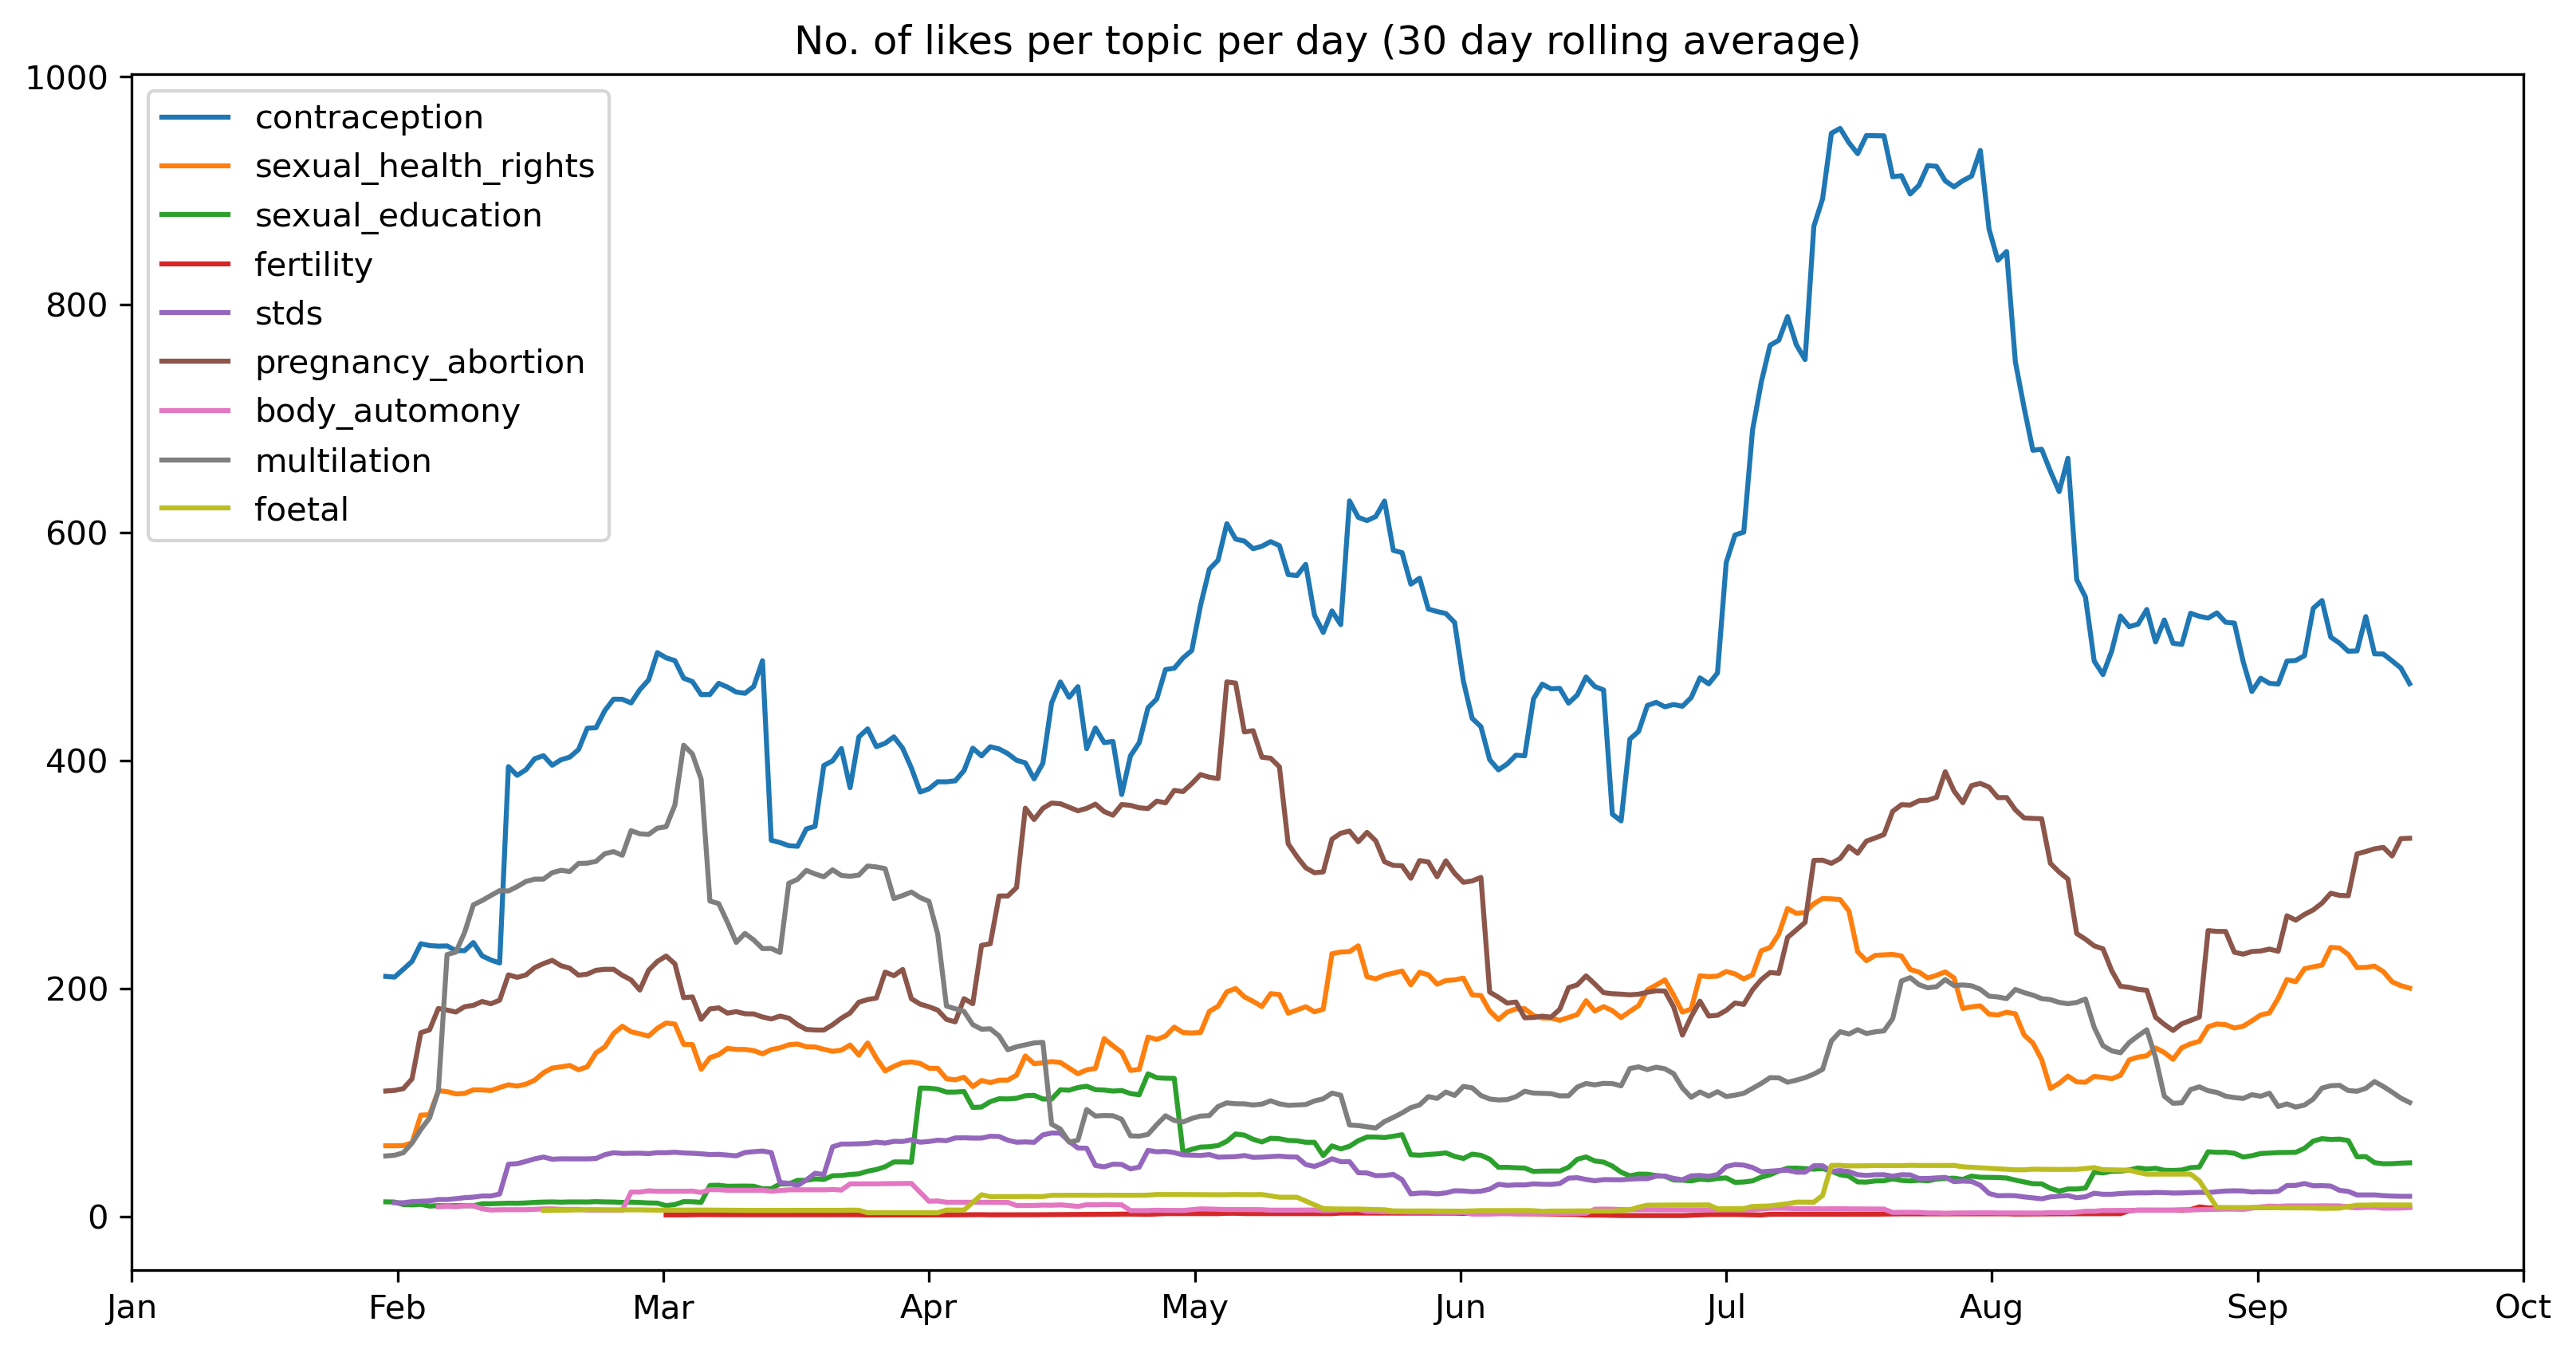

In [159]:
fig = plt.figure(figsize=(10, 5), dpi=300)

ax = fig.add_axes([0,0,1,1])
ax.set_title('No. of likes per topic per day (30 day rolling average)')

ax.plot(df[df['contraception'] == True].groupby('day').sum().reset_index()['day'], df[df['contraception'] == True].groupby('day').sum().reset_index()['no. of likes'].rolling(30).mean(), label='contraception')
ax.plot(df[df['sexual_health_rights'] == True].groupby('day').sum().reset_index()['day'], df[df['sexual_health_rights'] == True].groupby('day').sum().reset_index()['no. of likes'].rolling(30).mean(), label='sexual_health_rights')
ax.plot(df[df['sexual_education'] == True].groupby('day').sum().reset_index()['day'], df[df['sexual_education'] == True].groupby('day').sum().reset_index()['no. of likes'].rolling(30).mean(), label='sexual_education')
ax.plot(df[df['fertility'] == True].groupby('day').sum().reset_index()['day'], df[df['fertility'] == True].groupby('day').sum().reset_index()['no. of likes'].rolling(30).mean(), label='fertility')
ax.plot(df[df['stds'] == True].groupby('day').sum().reset_index()['day'], df[df['stds'] == True].groupby('day').sum().reset_index()['no. of likes'].rolling(30).mean(), label='stds')
ax.plot(df[df['pregnancy_abortion'] == True].groupby('day').sum().reset_index()['day'], df[df['pregnancy_abortion'] == True].groupby('day').sum().reset_index()['no. of likes'].rolling(30).mean(), label='pregnancy_abortion')
ax.plot(df[df['body_automony'] == True].groupby('day').sum().reset_index()['day'], df[df['body_automony'] == True].groupby('day').sum().reset_index()['no. of likes'].rolling(30).mean(), label='body_automony')
ax.plot(df[df['multilation'] == True].groupby('day').sum().reset_index()['day'], df[df['multilation'] == True].groupby('day').sum().reset_index()['no. of likes'].rolling(30).mean(), label='multilation')
ax.plot(df[df['foetal'] == True].groupby('day').sum().reset_index()['day'], df[df['foetal'] == True].groupby('day').sum().reset_index()['no. of likes'].rolling(30).mean(), label='foetal')

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']
plt.xticks(np.linspace(0,273,10), months)

ax.legend();

### sentiment

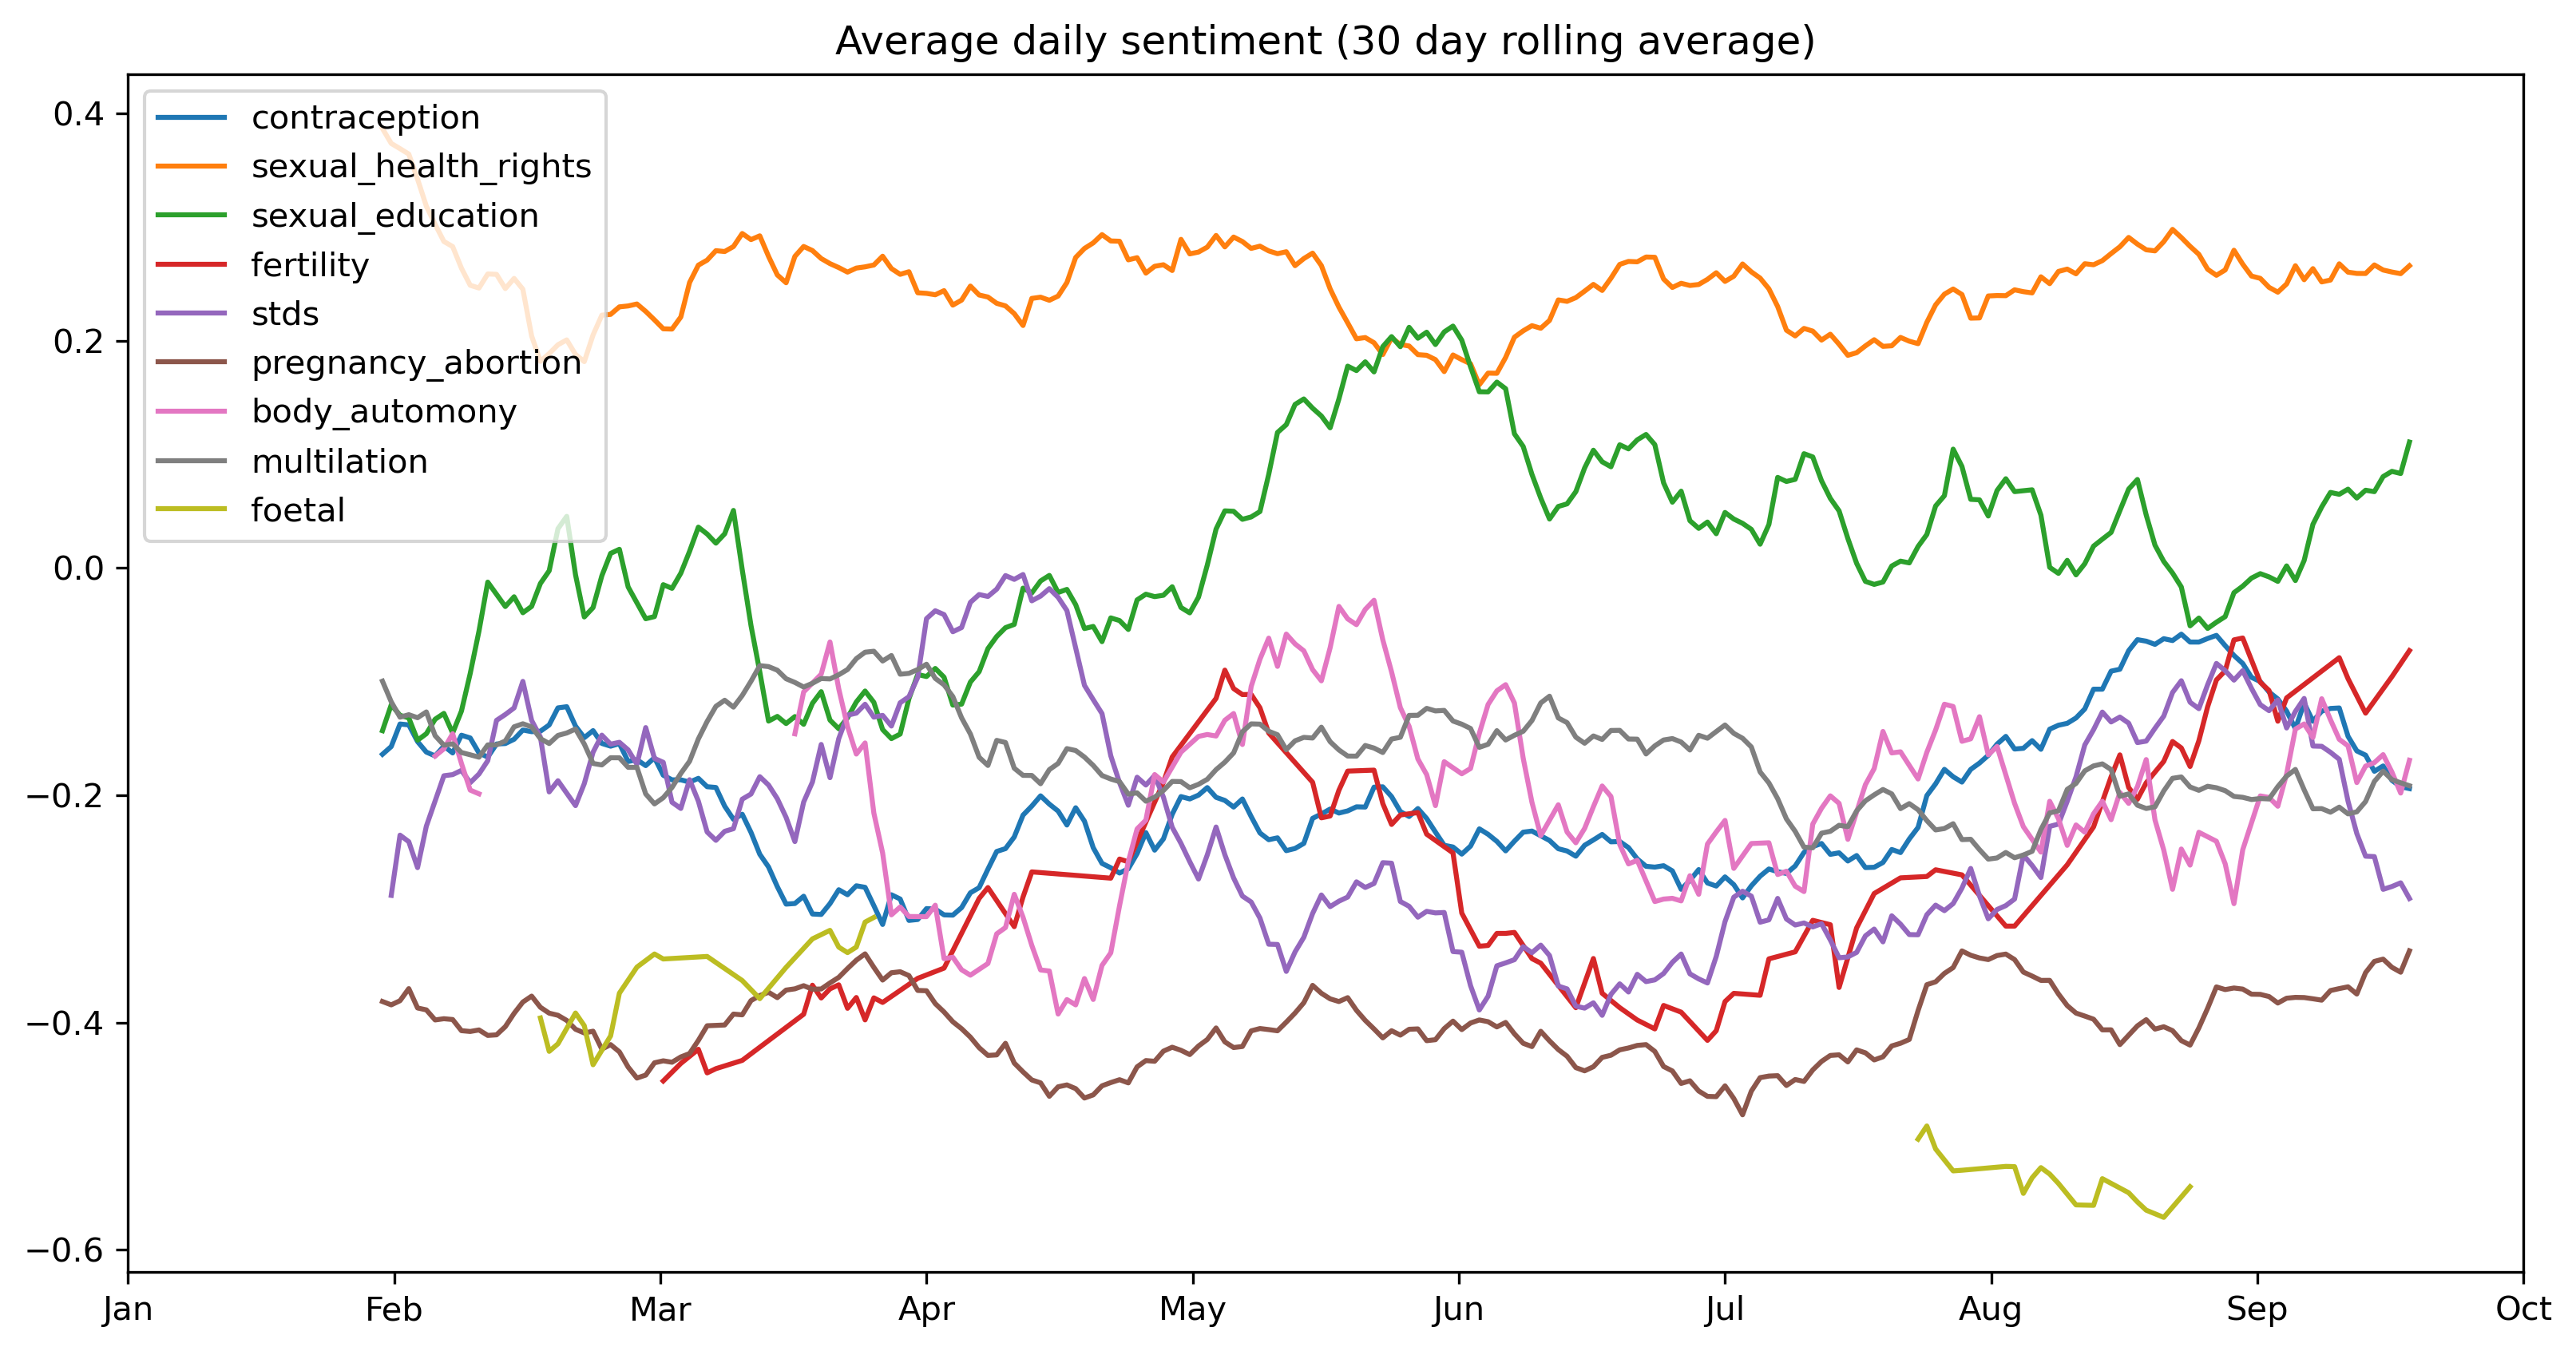

In [160]:
fig = plt.figure(figsize=(10, 5), dpi=300)

ax = fig.add_axes([0,0,1,1])
ax.set_title('Average daily sentiment (30 day rolling average)')

ax.plot(df[df['contraception']].groupby('day').sum().reset_index()['day'], df[df['contraception'] == True].groupby('day').mean().reset_index()['sentiment'].rolling(30).mean(), label='contraception')
ax.plot(df[df['sexual_health_rights']].groupby('day').sum().reset_index()['day'], df[df['sexual_health_rights'] == True].groupby('day').mean().reset_index()['sentiment'].rolling(30).mean(), label='sexual_health_rights')
ax.plot(df[df['sexual_education']].groupby('day').sum().reset_index()['day'], df[df['sexual_education'] == True].groupby('day').mean().reset_index()['sentiment'].rolling(30).mean(), label='sexual_education')
ax.plot(df[df['fertility']].groupby('day').sum().reset_index()['day'], df[df['fertility'] == True].groupby('day').mean().reset_index()['sentiment'].rolling(30).mean(), label='fertility')
ax.plot(df[df['stds']].groupby('day').sum().reset_index()['day'], df[df['stds'] == True].groupby('day').mean().reset_index()['sentiment'].rolling(30).mean(), label='stds')
ax.plot(df[df['pregnancy_abortion']].groupby('day').sum().reset_index()['day'], df[df['pregnancy_abortion'] == True].groupby('day').mean().reset_index()['sentiment'].rolling(30).mean(), label='pregnancy_abortion')
ax.plot(df[df['body_automony']].groupby('day').sum().reset_index()['day'], df[df['body_automony'] == True].groupby('day').mean().reset_index()['sentiment'].rolling(30).mean(), label='body_automony')
ax.plot(df[df['multilation']].groupby('day').sum().reset_index()['day'], df[df['multilation'] == True].groupby('day').mean().reset_index()['sentiment'].rolling(30).mean(), label='multilation')
ax.plot(df[df['foetal']].groupby('day').sum().reset_index()['day'], df[df['foetal'] == True].groupby('day').mean().reset_index()['sentiment'].rolling(30).mean(), label='foetal')


months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']
plt.xticks(np.linspace(0,273,10), months)

ax.legend();

### Getting means

In [165]:
print('Mean no of tweets per day for each topic:')
for key in topic_dict.keys():
    print(key + ':', round(np.mean(df[df[key]].groupby('day').sum()[key]), 1))
    

Mean no of tweets per day for each topic:
sexual_health_rights: 114.6
contraception: 221.1
sexual_education: 25.5
fertility: 4.1
stds: 24.3
pregnancy_abortion: 153.9
body_automony: 6.2
multilation: 82.2
foetal: 5.1


In [166]:
print('Mean no of likes per day for each topic:')
for key in topic_dict.keys():
    print(key + ':', round(np.mean(df[df[key]].groupby('day').sum()['no. of likes']), 1))
    

Mean no of likes per day for each topic:
sexual_health_rights: 163.8
contraception: 492.5
sexual_education: 45.7
fertility: 3.4
stds: 35.8
pregnancy_abortion: 251.2
body_automony: 9.0
multilation: 155.1
foetal: 15.0


### correlation

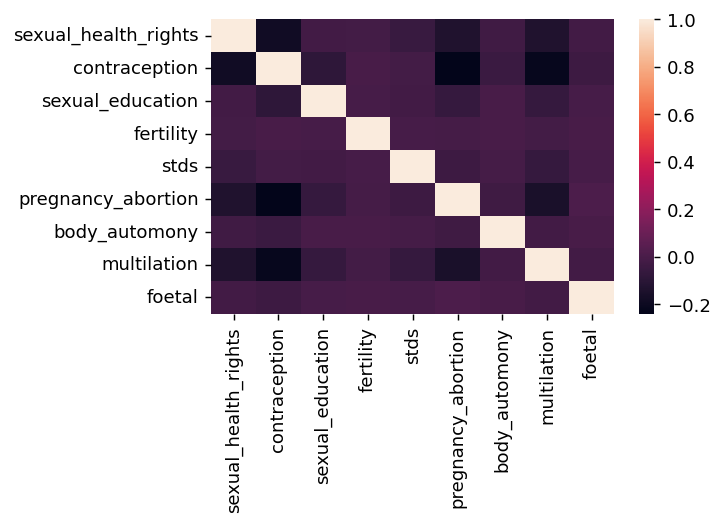

In [167]:
# there does not appear to be any significant correlation between any of the topics
# people are not predictably talking about 2 topics at the same time

plt.figure(figsize=(5, 3), dpi=130)
sns.heatmap(df[list(topic_dict.keys())].corr());

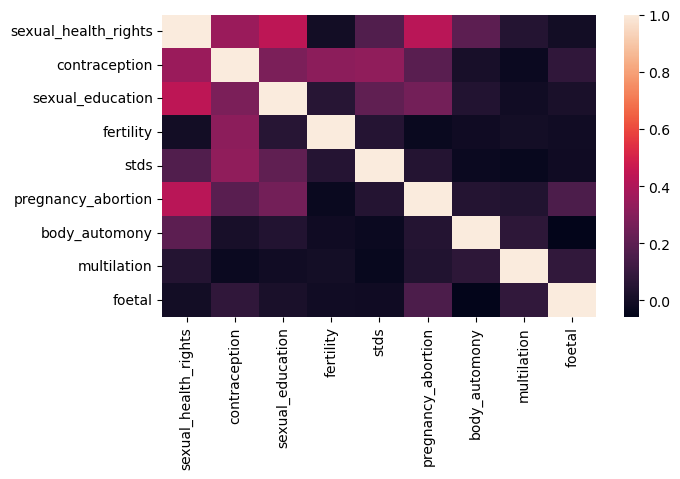

In [168]:
# looking at if the number of tweets about one topic relates to the number of tweets about another topic (per day)

# there is some correlation here between when people talk about sexual health and rights and when they talk about sexual education

plt.figure(figsize=(7, 4), dpi=100)
sns.heatmap(df[list(topic_dict.keys())+['day']].groupby('day').sum().corr());

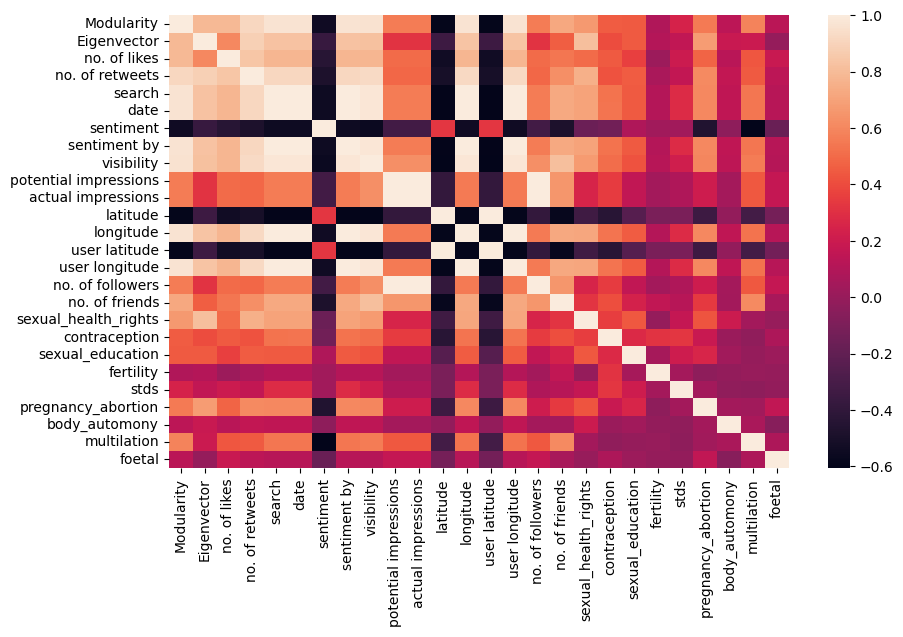

In [169]:
# looking at correlation between all variables per day

# this graph would nedd to be narrowed down to get any real insight

plt.figure(figsize=(10, 6), dpi=100)
sns.heatmap(df.drop(['no. of comments', 'no. of shares'], axis=1).groupby('day').sum().corr());